# CAPSTONE PROJECT
### Chandan Singh & Prasanna KM - Cohort 13



### Project Title : Credit Card Fraud Detection
### Project AIM  : Predict fraudulent credit card transactions with the help of machine learning models####  


####  Problem Overview:
- Digital Transactions are in the rise.
- Fraudulent transactions rises as well but at a higher pace
- Therefore it is the need of the hour to detect the fraudulent transaction
- Early fraud detection helps the bank as well as the end consumers and hence it is going to be a critical area to work upon

#### Project Methodology
- Data Understanding
- Exploratory Data Analysis (EDA)
- Data Scaling
- Model Building
- Model Evaluation
- Conclusion

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Data Understanding & Exploratory data analysis

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Get the no of rows and columns
print('\t Credit Card Fraud Dataset has {} rows and {} columns ..'.format(df.shape[0],df.shape[1]))

	 Credit Card Fraud Dataset has 284807 rows and 31 columns ..


In [5]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [7]:
normal_share

99.82725143693798

In [8]:
fraud_share

0.1727485630620034

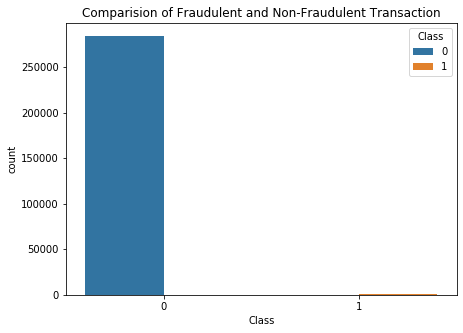

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize = (7,5))
sns.countplot(x= df['Class'], data = df, hue = 'Class')
plt.title('Comparision of Fraudulent and Non-Fraudulent Transaction')
plt.show()

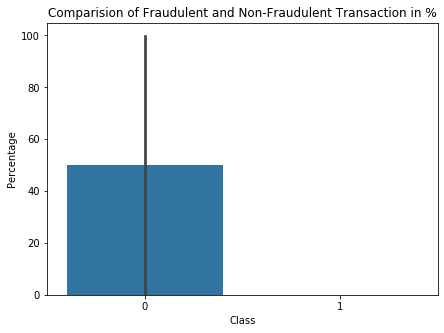

In [10]:
plt.figure(figsize = (7,5))
#sns.barplot(x= (df['Class'].value_counts()/len(df)*100), hue = df['Class'])
sns.barplot(x ='Class', y = (df['Class'].value_counts()/len(df))*100, data=df)
plt.ylabel('Percentage')
plt.title('Comparision of Fraudulent and Non-Fraudulent Transaction in %')
plt.show()

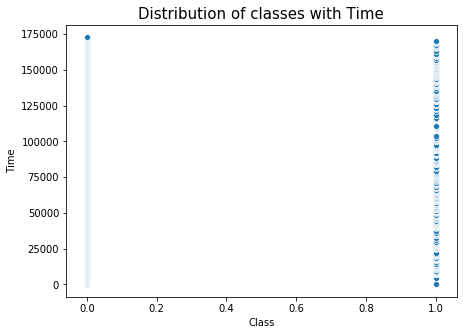

In [11]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize = (7,5))
sns.scatterplot(df['Class'], df['Time'])
plt.title('Distribution of classes with Time', fontsize = 15)
plt.show()

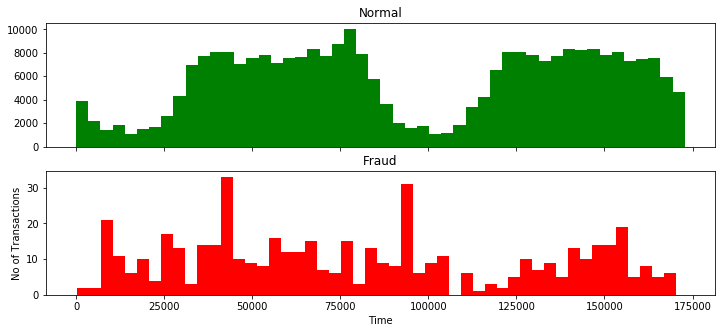

In [12]:
# plot to show distribution of classes with time

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,5))

bins = 50

ax1.hist(df.Time[df.Class == 0], bins = bins, color = 'green')
ax1.set_title('Normal')

ax2.hist(df.Time[df.Class == 1], bins = bins, color = 'red')
ax2.set_title('Fraud')

plt.xlabel('Time')
plt.ylabel('No of Transactions')
plt.show()

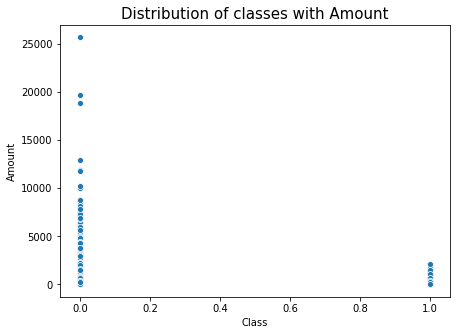

In [13]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize = (7,5))
sns.scatterplot(df['Class'], df['Amount'])
plt.title('Distribution of classes with Amount', fontsize = 15)
plt.show()

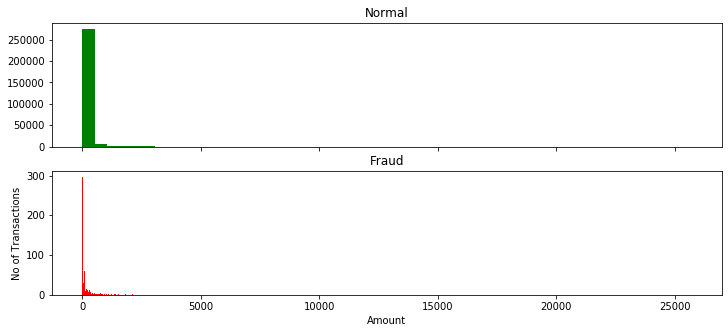

In [14]:
# plot to show distribution of classes with Amount

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,5))

bins = 50

ax1.hist(df.Amount[df.Class == 0], bins = bins, color = 'green')
ax1.set_title('Normal')

ax2.hist(df.Amount[df.Class == 1], bins = bins, color = 'red')
ax2.set_title('Fraud')

plt.xlabel('Amount')
plt.ylabel('No of Transactions')
plt.show()

In [15]:
# Drop unnecessary columns
df = df.drop('Time', axis = 1)

In [16]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Summary - Data Understanding
- The CSV data file is loaded and named as 'df'
- The Data head is viewed
- The dataframe has a shape of 284807 Rows & 31 Columns
- The statistics of all the column variabls are onserved, all the colums except for 'Time', 'Amount' & 'Class' seem to be transformed
- The Column titles are checked and all the transformed colums are named from V1 till V28 and the 3 non trnasformed columns as mentioned above
- The Data type of the dataframe is checked, all the colums are of data type 'float64' except for Class which is of type 'int'
- There are no missing values observed
- Class Imbalance: It can be onserved from the Class share and the ablove visualization between normal and fraud class that the datafarme is highly imbalanced with very few Class'1' or fraud cases. Since this model needs to predict maximum fraud casses, class imbalance treatement is of atmost importance. Necessary class impalance imputation techniques will be used as the model is designed.

### Data Scaling

In [17]:
### Scale the Amount Variable using Standard Scaler
from sklearn.preprocessing import StandardScaler
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### Splitting the data into train & test data

In [18]:
# Putting feature variable to X
X = df.drop(['Class'],axis=1)

In [19]:
#class variable
y= df['Class']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75 , stratify = y, random_state=0)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [21]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
369
123


### Plotting the distribution of a variable

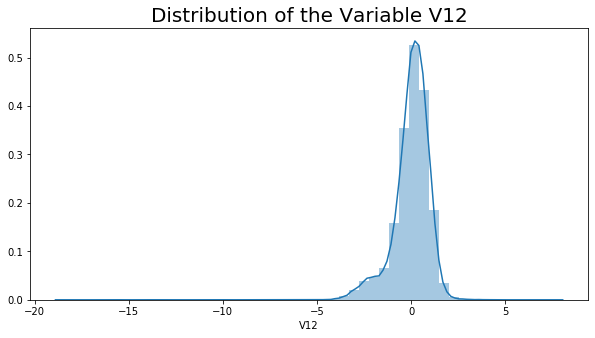

In [22]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize = (10,5))
sns.distplot(X_train['V12'])
plt.title('Distribution of the Variable V12', fontsize = 20)
plt.show()


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [23]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy=False)
pt.fit_transform(X_train)
pt.fit_transform(X_test)

array([[-0.82703883,  0.45955941,  0.70605096, ...,  0.62196088,
         0.21202255, -0.83306285],
       [-0.56998958,  0.02175218,  1.02260297, ...,  0.26179487,
        -0.3898182 , -0.50280056],
       [-0.53586264,  0.62657988, -0.08748992, ...,  1.22395844,
         0.92207674, -0.73090078],
       ...,
       [-0.66933856,  0.73659575,  0.58316254, ...,  0.69796602,
         0.39715677, -0.17385212],
       [-0.38924622,  0.59940559, -0.12320189, ...,  0.86813261,
         0.43374181, -0.79718065],
       [-0.06272673,  0.39158956, -0.63814716, ...,  0.37098556,
         0.51851928,  0.88445785]])

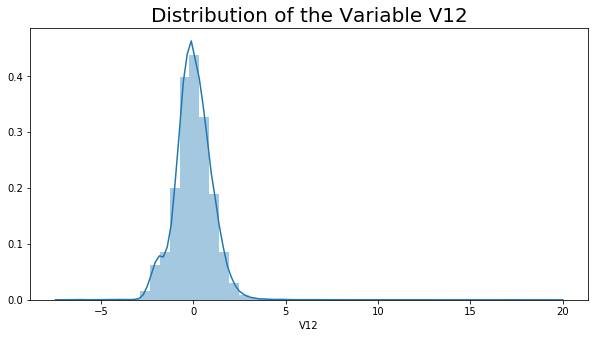

In [24]:
# plot the histogram of a variable from the dataset again to see the result 
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize = (10,5))
sns.distplot(X_train['V12'])
plt.title('Distribution of the Variable V12', fontsize = 20)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

### Baseline Model(Logistic Regression)

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=-1, penalty='l2', random_state=0,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [26]:
# Check the accuracy of the vanila Logistic Regression Model
logreg.score(X_train, y_train)

0.9992649984785

### L1(Lasso) Regression

In [26]:
# grid search CV
folds = 5

# specify range of hyperparameters
params =  {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}
# grid search
# Lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model
                        , param_grid = params 
                        , scoring= 'roc_auc' 
                        , cv = folds 
                        , return_train_score=True
                        , verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    6.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [27]:
# Store the results in a dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.126569,0.004785,0.018745,0.006248,0.001,{'alpha': 0.001},0.945225,0.939487,0.905876,0.947076,...,0.93689,0.015747,1,0.938488,0.930816,0.946227,0.941459,0.939506,0.939299,0.005007
1,0.097153,0.012022,0.019410,0.006056,0.01,{'alpha': 0.01},0.846667,0.821449,0.836694,0.888183,...,0.86045,0.032944,2,0.864868,0.862504,0.863129,0.855948,0.861628,0.861615,0.003026
2,0.090604,0.006249,0.009373,0.007653,0.1,{'alpha': 0.1},0.500000,0.500000,0.500000,0.500000,...,0.50000,0.000000,3,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
3,0.093730,0.009882,0.009372,0.007652,1,{'alpha': 1.0},0.500000,0.500000,0.500000,0.500000,...,0.50000,0.000000,3,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
4,0.099976,0.012498,0.015621,0.000003,5,{'alpha': 5.0},0.500000,0.500000,0.500000,0.500000,...,0.50000,0.000000,3,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000


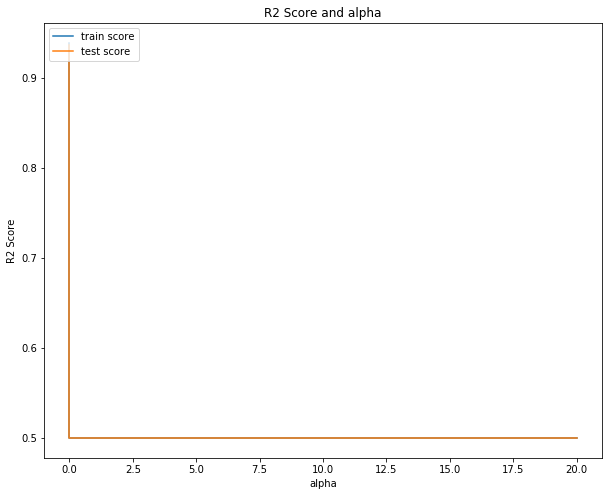

In [28]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize = (10, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [29]:
model_cv.best_score_

0.9368897328097577

In [30]:
model_cv.best_params_

{'alpha': 0.001}

In [31]:
lasso_red = Lasso(alpha=0.01)
lasso_red.fit(X_train,y_train)

y_train_pred = lasso_red.predict(X_train)

print('Num of Non-Zero Coeff {}'.format(np.sum(lasso_red.coef_ != 0)))
print('Train R2 score {}' .format(r2_score(y_true=y_train,y_pred=y_train_pred)))

Num of Non-Zero Coeff 2
Train R2 score 0.029439244030309175


### Random Forest

##### Random Forest : 1

In [32]:
# Split the data into Train_cv and Test_cv
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X, y, train_size = 0.75 , stratify = y, random_state=0)

In [33]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rf = RandomForestClassifier()

# parameters to build the model on
params = {'n_estimators': range(50, 500, 50)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


# create gridsearch object
model = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [34]:
# Fit the model
model.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 66.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [35]:
# scores of GridSearch CV
scores = model.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,137.341893,7.514512,0.488671,0.101890,50,{'n_estimators': 50},0.917543,0.945157,0.951538,0.931305,0.958135,0.940735,0.014600,9
1,270.177748,8.096243,0.843551,0.083249,100,{'n_estimators': 100},0.943656,0.944651,0.957845,0.937565,0.971346,0.951012,0.012129,8
2,399.707850,12.410349,1.261976,0.132742,150,{'n_estimators': 150},0.943127,0.951185,0.964092,0.943722,0.957448,0.951914,0.008047,7
3,535.458481,12.073693,1.610378,0.170640,200,{'n_estimators': 200},0.950181,0.950501,0.957321,0.943412,0.970450,0.954373,0.009163,6
4,652.509253,20.990841,1.814178,0.035900,250,{'n_estimators': 250},0.949509,0.950213,0.963543,0.950120,0.970771,0.956831,0.008738,5
5,736.778020,18.545001,2.214326,0.033040,300,{'n_estimators': 300},0.956718,0.963750,0.956851,0.942842,0.970372,0.958106,0.009152,4
6,844.615083,28.974744,2.519536,0.025201,350,{'n_estimators': 350},0.949151,0.963304,0.963622,0.955854,0.970665,0.960519,0.007366,2
7,978.443786,41.784418,2.961802,0.091941,400,{'n_estimators': 400},0.956384,0.962986,0.956511,0.955498,0.963364,0.958948,0.003470,3
8,1055.646741,39.348220,2.702487,0.500565,450,{'n_estimators': 450},0.955913,0.962524,0.969718,0.955520,0.976940,0.964123,0.008241,1


In [36]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best Parameters: ", model.best_params_)

Best AUC:  0.9641226484429415
Best Parameters:  {'n_estimators': 450}


##### It seems we are getting good accuracy in the range 450 to 500 tress, let's narrow it down.

##### Random Forest : 2

In [37]:
# parameters to build the model on
params = {'n_estimators': range(450, 500, 10)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


# create gridsearch object
model2 = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [38]:
# Fit the model
model2.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 70.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [39]:
# scores of GridSearch CV on RF Model2
scores = model2.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1092.957210,40.252684,3.289849,0.041447,450,{'n_estimators': 450},0.941889,0.956525,0.969951,0.949232,0.969922,0.957503,0.011156,4
1,1115.898173,32.325501,3.367956,0.027236,460,{'n_estimators': 460},0.948996,0.956595,0.956362,0.955676,0.969679,0.957462,0.006724,5
2,1145.109840,39.707394,3.452311,0.035622,470,{'n_estimators': 470},0.961790,0.956376,0.968992,0.948665,0.976744,0.962513,0.009741,1
3,1195.951250,58.812333,4.065089,0.358240,480,{'n_estimators': 480},0.948780,0.976118,0.956207,0.961706,0.969097,0.962382,0.009564,2
4,1167.284499,157.062818,3.384345,0.816705,490,{'n_estimators': 490},0.961847,0.962540,0.962080,0.961730,0.962854,0.962210,0.000425,3


In [40]:
# print best hyperparameters
print("Best AUC: ", model2.best_score_)
print("Best Parameters: ", model2.best_params_)

Best AUC:  0.9625132476387378
Best Parameters:  {'n_estimators': 470}


#### It seems we are getting good accuracy in the range 470 to 480 tress, let's narrow it down further.

#### Random Forest : 3

In [41]:
# parameters to build the model on
params = {'n_estimators': range(470, 480, 2)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


# create gridsearch object
model3 = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [42]:
# Fit the model
model3.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 98.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [43]:
# scores of GridSearch CV on RF Model3
scores = model3.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1578.032000,71.838082,5.569085,0.558240,470,{'n_estimators': 470},0.955554,0.956089,0.962573,0.955130,0.969715,0.959812,0.005650,3
1,1712.892204,167.957188,5.290408,0.762074,472,{'n_estimators': 472},0.968437,0.962911,0.949156,0.955109,0.975827,0.962288,0.009439,2
2,1866.279403,76.198630,5.997507,0.265415,474,{'n_estimators': 474},0.961930,0.956051,0.969537,0.962146,0.969713,0.963875,0.005179,1
3,1778.678173,50.090477,4.994573,1.002620,476,{'n_estimators': 476},0.955633,0.949415,0.962864,0.948588,0.976350,0.958570,0.010263,4
4,1528.259419,378.776304,3.550627,1.266017,478,{'n_estimators': 478},0.955335,0.955944,0.962970,0.955151,0.963036,0.958487,0.003697,5


In [44]:
# print best hyperparameters
print("Best AUC: ", model3.best_score_)
print("Best Parameters: ", model3.best_params_)

Best AUC:  0.9638754145678303
Best Parameters:  {'n_estimators': 474}


#### The best AUC can be achieved with 474 trees, let's try other hyperparameters

### XGBoost

In [50]:
# hyperparameter tuning with XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9, 0.12]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

In [51]:
# fit the model
model_cv.fit(X_train_cv, y_train_cv) 

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  7.6min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                   

In [52]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8.593028,0.550758,0.136544,0.019859,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.989270,0.972615,0.975350,0.979078,0.007292,4,0.998572,0.998644,0.998582,0.998599,3.175648e-05
1,12.711527,0.104734,0.156213,0.000000,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.991983,0.976325,0.978131,0.982146,0.006994,2,0.998448,0.999289,0.999183,0.998973,3.740558e-04
2,14.611596,0.173026,0.145799,0.026551,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.992763,0.980679,0.977484,0.983642,0.006580,1,0.998379,0.999288,0.999508,0.999058,4.889736e-04
3,7.329410,0.113344,0.151006,0.014728,0.1,0.12,"{'learning_rate': 0.1, 'subsample': 0.12}",0.982279,0.973469,0.972918,0.976222,0.004289,7,0.992931,0.996181,0.995679,0.994931,1.428391e-03
4,10.405404,0.081864,0.171835,0.012755,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.986038,0.969785,0.962766,0.972863,0.009746,9,0.999828,0.999859,0.999865,0.999851,1.642068e-05
5,14.612561,0.325064,0.191127,0.005192,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.989880,0.974790,0.969087,0.977919,0.008772,5,0.999958,0.999982,0.999980,0.999973,1.091156e-05
6,18.703125,1.828918,0.166627,0.029456,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.986785,0.978170,0.973631,0.979529,0.005456,3,0.999952,0.999981,0.999981,0.999971,1.375679e-05
7,8.408584,0.085593,0.171835,0.012754,0.2,0.12,"{'learning_rate': 0.2, 'subsample': 0.12}",0.967942,0.972658,0.973205,0.971268,0.002363,11,0.995853,0.996922,0.996694,0.996490,4.597088e-04
8,10.967727,0.071268,0.177041,0.014728,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.971478,0.968402,0.974735,0.971538,0.002586,10,0.999998,1.000000,0.999999,0.999999,7.009607e-07
9,14.710955,0.064066,0.197870,0.007364,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.987831,0.971589,0.972041,0.977154,0.007552,6,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [53]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8.593028,0.550758,0.136544,0.019859,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.989270,0.972615,0.975350,0.979078,0.007292,4,0.998572,0.998644,0.998582,0.998599,0.000032
1,12.711527,0.104734,0.156213,0.000000,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.991983,0.976325,0.978131,0.982146,0.006994,2,0.998448,0.999289,0.999183,0.998973,0.000374
2,14.611596,0.173026,0.145799,0.026551,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.992763,0.980679,0.977484,0.983642,0.006580,1,0.998379,0.999288,0.999508,0.999058,0.000489
3,7.329410,0.113344,0.151006,0.014728,0.1,0.12,"{'learning_rate': 0.1, 'subsample': 0.12}",0.982279,0.973469,0.972918,0.976222,0.004289,7,0.992931,0.996181,0.995679,0.994931,0.001428
4,10.405404,0.081864,0.171835,0.012755,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.986038,0.969785,0.962766,0.972863,0.009746,9,0.999828,0.999859,0.999865,0.999851,0.000016


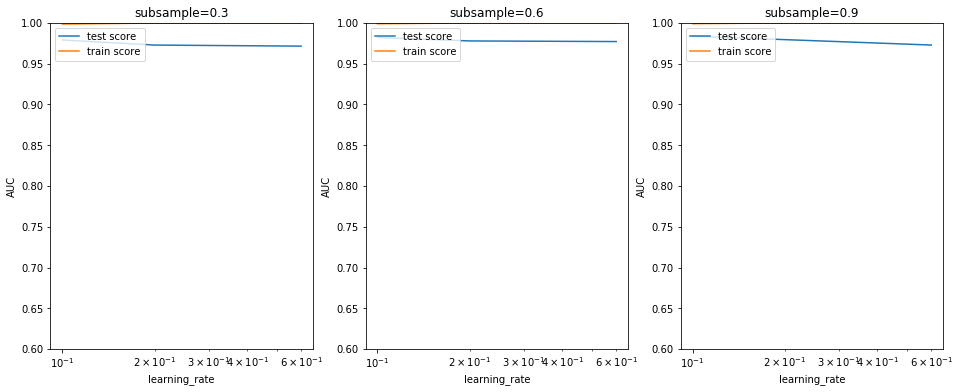

In [55]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.1, 0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [56]:
# print best hyperparameters
print("Best AUC: ", model_cv.best_score_)
print("Best Parameters: ", model_cv.best_params_)

Best AUC:  0.9836423462218187
Best Parameters:  {'learning_rate': 0.1, 'subsample': 0.9}


The results show that a subsample size of 0.9 and learning_rate of about 0.1 seems optimal. Also, XGBoost has resulted in the highest ROC AUC obtained (across various hyperparameters).

Let's build a final model with the chosen hyperparameters.

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [65]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
param = {'learning_rate': 0.1,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

In [74]:
#clf = XGBClassifier(parameters = param)
clf = XGBClassifier(max_depth=2, n_estimators=200, learning_rate = 0.1, subsample = 0.9) #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)

# predict
y_pred = clf.predict_proba(X_test)

auc = roc_auc_score(y_test, y_pred[:, 1])

#print the evaluation score on the X_test by choosing the best evaluation metric
auc

0.9857497388969584

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


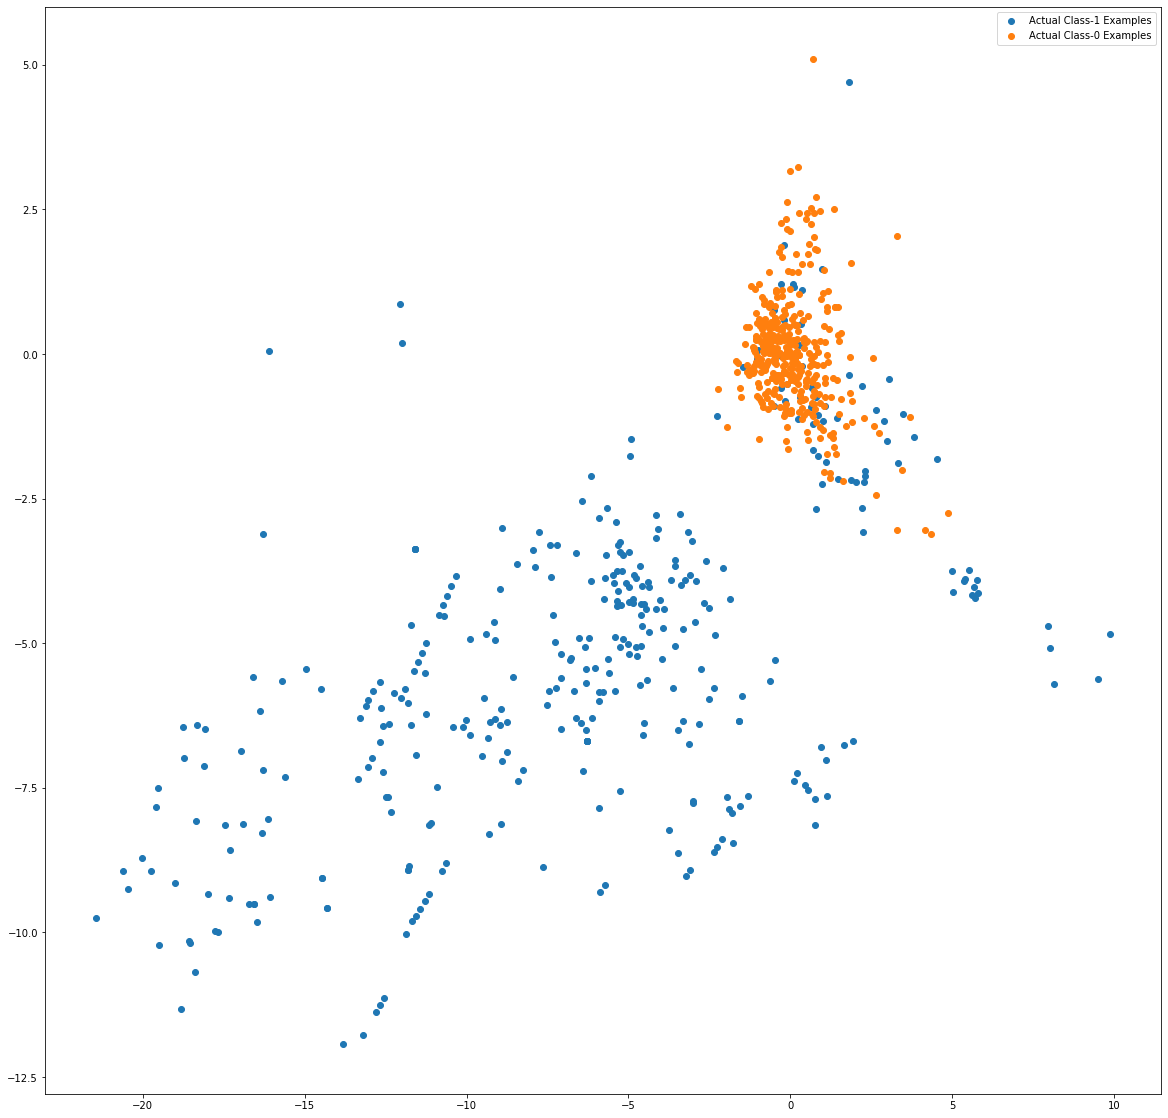

In [75]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [59]:
# Logistic Regression
from sklearn import linear_model #import the package

#num_C = ______  #--> list of values
#cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [25]:
from imblearn import over_sampling #- import the packages
from imblearn.over_sampling import RandomOverSampler
randsamp= RandomOverSampler(random_state = 42)
X_train_res,y_train_res = randsamp.fit_sample(X_train,y_train)

In [30]:
print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of X_train: (426472, 29)
After OverSampling, the shape of y_train: (426472,) 

After OverSampling, counts of label '1': 213236
After OverSampling, counts of label '0': 213236


In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
logreg.fit(X_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=-1, penalty='l2', random_state=0,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [32]:
# Check the accuracy of the vanila Logistic Regression Model
logreg.score(X_train, y_train)

0.9780061328152431

#### Random Forest :1

In [43]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rf1 = RandomForestClassifier()

# parameters to build the model on
params = {'n_estimators': range(50, 500, 50)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


# create gridsearch object
model = GridSearchCV(estimator=rf1, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)


In [44]:
# Fit the model
model.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 64.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [45]:
# scores of GridSearch CV
scores = model.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,119.660246,2.791066,0.645385,0.011911,50,{'n_estimators': 50},1.0,0.999988,1.0,0.999988,0.999988,0.999993,5.743646e-06,9
1,253.327155,6.444042,1.497054,0.056781,100,{'n_estimators': 100},1.0,1.000000,1.0,1.000000,1.000000,1.000000,0.000000e+00,1
2,397.656563,3.246746,2.160350,0.026866,150,{'n_estimators': 150},1.0,1.000000,1.0,1.000000,1.000000,1.000000,4.965057e-17,1
3,528.197991,2.999529,2.906754,0.063584,200,{'n_estimators': 200},1.0,1.000000,1.0,1.000000,1.000000,1.000000,0.000000e+00,1
4,658.430390,2.504874,3.571389,0.035553,250,{'n_estimators': 250},1.0,1.000000,1.0,1.000000,1.000000,1.000000,4.965057e-17,1
5,798.895101,10.028205,4.224927,0.039439,300,{'n_estimators': 300},1.0,1.000000,1.0,1.000000,1.000000,1.000000,0.000000e+00,1
6,923.555885,6.971760,4.892302,0.023790,350,{'n_estimators': 350},1.0,1.000000,1.0,1.000000,1.000000,1.000000,9.930113e-17,1
7,1037.509356,15.841225,5.373734,0.354022,400,{'n_estimators': 400},1.0,1.000000,1.0,1.000000,1.000000,1.000000,4.965057e-17,1
8,925.548389,102.257801,4.125014,0.503238,450,{'n_estimators': 450},1.0,1.000000,1.0,1.000000,1.000000,1.000000,0.000000e+00,1


In [46]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best Parameters: ", model.best_params_)

Best AUC:  1.0
Best Parameters:  {'n_estimators': 100}


#### Random Forest :2

In [47]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rf2 = RandomForestClassifier()

# parameters to build the model on
params = {'n_estimators': range(90, 110, 10)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


# create gridsearch object
model = GridSearchCV(estimator=rf2, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [48]:
# Fit the model
model.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  4.0min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [49]:
# scores of GridSearch CV
scores = model.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,219.272679,2.568099,1.246583,0.081708,90,{'n_estimators': 90},1.000000,1.0,1.0,1.0,1.0,1.000000,0.000000,1
1,190.506498,57.613091,0.896662,0.178559,100,{'n_estimators': 100},0.999988,1.0,1.0,1.0,1.0,0.999998,0.000005,2


In [50]:

# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best Parameters: ", model.best_params_)

Best AUC:  1.0
Best Parameters:  {'n_estimators': 90}


In [51]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rf3 = RandomForestClassifier()

# parameters to build the model on
params = {'n_estimators': range(85, 90, 1)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


# create gridsearch object
model = GridSearchCV(estimator=rf3, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [52]:
# Fit the model
model.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 12.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [53]:
# scores of GridSearch CV
scores = model.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,206.694098,1.653541,1.222897,0.032018,85,{'n_estimators': 85},1.000000,1.0,1.0,1.000000,1.0,1.000000,4.965115e-17,1
1,215.451706,10.372474,1.234939,0.043928,86,{'n_estimators': 86},0.999988,1.0,1.0,1.000000,1.0,0.999998,4.689585e-06,4
2,233.134884,1.361295,1.277823,0.045704,87,{'n_estimators': 87},1.000000,1.0,1.0,0.999988,1.0,0.999998,4.689653e-06,4
3,234.120704,1.090264,1.268973,0.096992,88,{'n_estimators': 88},1.000000,1.0,1.0,1.000000,1.0,1.000000,0.000000e+00,1
4,204.423278,59.152654,0.871677,0.157267,89,{'n_estimators': 89},1.000000,1.0,1.0,1.000000,1.0,1.000000,0.000000e+00,1


In [54]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best Parameters: ", model.best_params_)

Best AUC:  1.0
Best Parameters:  {'n_estimators': 85}


### XGBoost

In [61]:
# hyperparameter tuning with XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9, 0.12]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

In [63]:
# fit the model
model_cv.fit(X_train_res, y_train_res) 

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 13.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                   

In [64]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,16.413243,0.845350,0.225091,0.008540,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.999760,0.999680,0.999704,0.999715,0.000033,9,0.999713,0.999752,0.999711,0.999726,1.887780e-05
1,21.825529,0.422333,0.226159,0.010552,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.999739,0.999666,0.999713,0.999706,0.000030,11,0.999685,0.999733,0.999715,0.999711,1.959016e-05
2,25.741040,0.781317,0.264179,0.023562,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.999728,0.999651,0.999679,0.999686,0.000032,12,0.999684,0.999719,0.999673,0.999692,1.975172e-05
3,16.290672,0.049268,0.263699,0.004338,0.1,0.12,"{'learning_rate': 0.1, 'subsample': 0.12}",0.999743,0.999673,0.999703,0.999707,0.000029,10,0.999705,0.999741,0.999716,0.999721,1.499579e-05
4,20.800788,0.598226,0.269855,0.002110,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999939,0.999902,0.999932,0.999924,0.000016,5,0.999940,0.999937,0.999929,0.999935,4.917620e-06
5,25.596472,0.111016,0.270014,0.010680,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999932,0.999903,0.999917,0.999917,0.000012,6,0.999922,0.999944,0.999916,0.999927,1.209382e-05
6,27.621728,0.054025,0.268334,0.010994,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999938,0.999864,0.999923,0.999908,0.000032,8,0.999929,0.999926,0.999920,0.999925,3.860821e-06
7,16.148699,0.037362,0.262048,0.008810,0.2,0.12,"{'learning_rate': 0.2, 'subsample': 0.12}",0.999935,0.999887,0.999928,0.999917,0.000021,7,0.999927,0.999937,0.999924,0.999929,5.622972e-06
8,20.277552,0.064779,0.271410,0.010155,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999992,0.999970,0.999975,0.999979,0.000009,2,1.000000,0.999999,1.000000,1.000000,5.146150e-07
9,25.399759,0.017272,0.269399,0.006479,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999987,0.999960,0.999976,0.999974,0.000011,4,1.000000,1.000000,0.999997,0.999999,1.522549e-06


In [65]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,16.413243,0.845350,0.225091,0.008540,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.999760,0.999680,0.999704,0.999715,0.000033,9,0.999713,0.999752,0.999711,0.999726,0.000019
1,21.825529,0.422333,0.226159,0.010552,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.999739,0.999666,0.999713,0.999706,0.000030,11,0.999685,0.999733,0.999715,0.999711,0.000020
2,25.741040,0.781317,0.264179,0.023562,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.999728,0.999651,0.999679,0.999686,0.000032,12,0.999684,0.999719,0.999673,0.999692,0.000020
3,16.290672,0.049268,0.263699,0.004338,0.1,0.12,"{'learning_rate': 0.1, 'subsample': 0.12}",0.999743,0.999673,0.999703,0.999707,0.000029,10,0.999705,0.999741,0.999716,0.999721,0.000015
4,20.800788,0.598226,0.269855,0.002110,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999939,0.999902,0.999932,0.999924,0.000016,5,0.999940,0.999937,0.999929,0.999935,0.000005


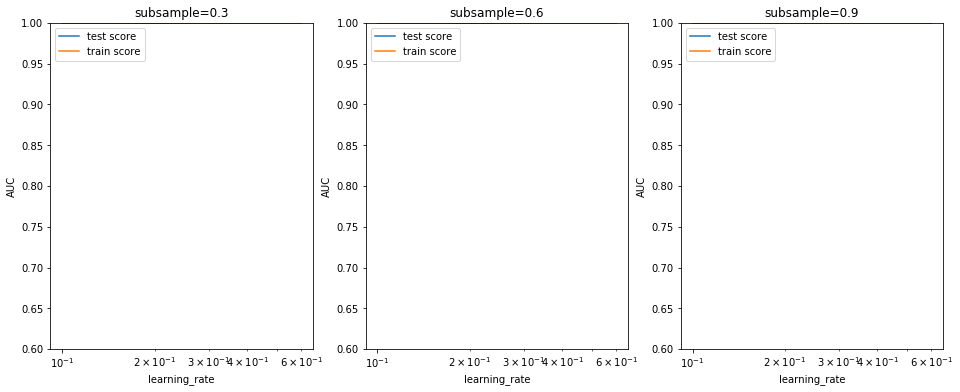

In [66]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.1, 0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}

for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [67]:
# print best hyperparameters
print("Best AUC: ", model_cv.best_score_)
print("Best Parameters: ", model_cv.best_params_)

Best AUC:  0.9999810349775075
Best Parameters:  {'learning_rate': 0.6, 'subsample': 0.9}


#### Split the dataset into Train and Test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75 , stratify = y, random_state=0)

### Print the class distribution after applying SMOTE 

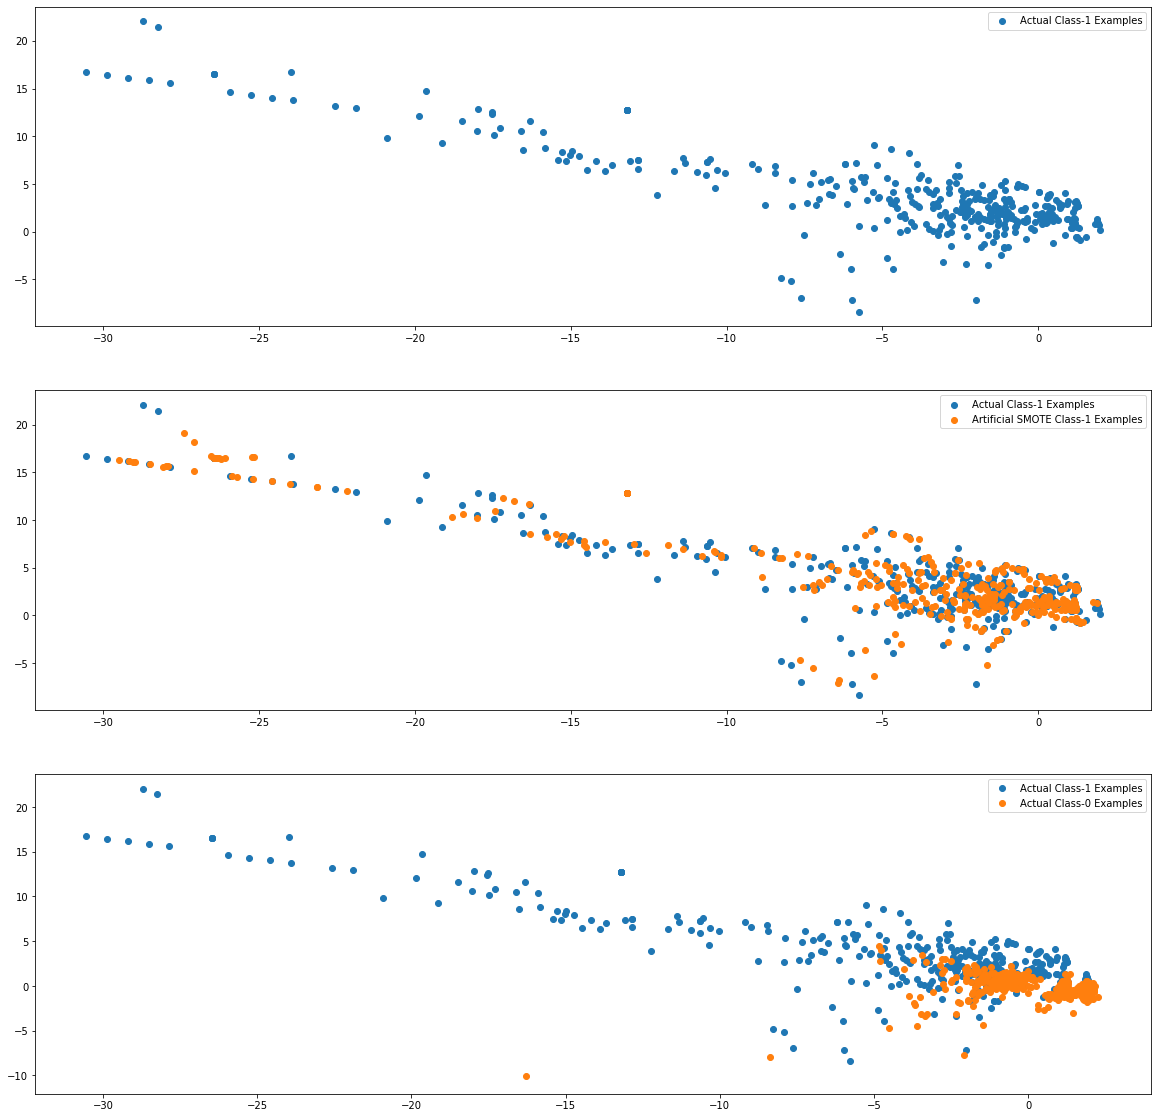

In [32]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Vanilla Logistic Regression Using Smote

In [33]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
logreg.fit(X_train_smote, y_train_smote)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=-1, penalty='l2', random_state=0,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [34]:
# Check the accuracy of the vanila Logistic Regression Model
logreg.score(X_train_smote, y_train_smote)

0.9496567183777599

#### Random Forest Model Using  Smote

In [71]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rf = RandomForestClassifier()

# parameters to build the model on
params = {'n_estimators': range(50, 500, 50)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


# create gridsearch object
model = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [72]:
# Fit the model
model.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 116.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [73]:
# scores of GridSearch CV
scores = model.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,229.004412,3.787519,0.959684,0.054322,50,{'n_estimators': 50},0.999987,0.999999,1.0,0.999988,0.999998,0.999994,5.605897e-06,9
1,483.700075,12.738657,1.743639,0.069364,100,{'n_estimators': 100},0.999999,0.999999,1.0,0.999987,0.999997,0.999997,4.656202e-06,7
2,719.619753,12.084672,2.548975,0.033569,150,{'n_estimators': 150},0.999999,0.999999,1.0,0.999998,0.999997,0.999999,8.134925e-07,5
3,941.003277,7.165454,3.300925,0.017871,200,{'n_estimators': 200},0.999999,0.999999,1.0,0.999998,0.999986,0.999997,5.315647e-06,8
4,1172.527824,6.492921,4.106709,0.036377,250,{'n_estimators': 250},0.999999,0.999999,1.0,0.999987,0.999998,0.999997,4.832547e-06,6
5,1399.326948,5.132257,4.909452,0.034621,300,{'n_estimators': 300},0.999999,0.999999,1.0,0.999999,0.999999,0.999999,4.112069e-07,1
6,1690.029863,29.080111,6.142462,0.146088,350,{'n_estimators': 350},0.999999,1.000000,1.0,0.999998,0.999999,0.999999,7.013883e-07,3
7,1966.255617,38.367751,6.342591,0.306208,400,{'n_estimators': 400},0.999999,0.999999,1.0,0.999998,0.999998,0.999999,6.520557e-07,2
8,1730.042360,193.345007,4.752663,0.921049,450,{'n_estimators': 450},0.999999,0.999999,1.0,0.999999,0.999998,0.999999,6.341683e-07,4


In [74]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best Parameters: ", model.best_params_)

Best AUC:  0.999999118200719
Best Parameters:  {'n_estimators': 300}


#### Random Forest :2

In [29]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rf1 = RandomForestClassifier()

# parameters to build the model on
params = {'n_estimators': range(250, 320, 10)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


# create gridsearch object
model = GridSearchCV(estimator=rf1, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [30]:
# Fit the model
model.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed: 98.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [31]:
# scores of GridSearch CV
scores = model.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1144.312301,5.548804,4.108411,0.070557,250,{'n_estimators': 250},1.000000,0.999999,1.0,0.999987,0.999998,0.999997,4.828445e-06,7
1,1195.041541,7.932305,4.211512,0.025383,260,{'n_estimators': 260},0.999999,0.999999,1.0,0.999987,0.999999,0.999997,4.860564e-06,6
2,1235.518036,14.649303,4.402092,0.047791,270,{'n_estimators': 270},0.999999,0.999999,1.0,0.999998,0.999999,0.999999,6.097056e-07,1
3,1278.561388,7.121206,4.594952,0.093992,280,{'n_estimators': 280},1.000000,1.000000,1.0,0.999998,0.999998,0.999999,7.422962e-07,3
4,1329.970289,9.338420,4.658283,0.026877,290,{'n_estimators': 290},0.999999,0.999999,1.0,0.999999,0.999998,0.999999,5.619489e-07,4
5,1368.824605,13.988849,4.648910,0.257557,300,{'n_estimators': 300},0.999999,0.999999,1.0,0.999999,0.999998,0.999999,4.945512e-07,2
6,1071.456121,263.975577,3.253135,0.627738,310,{'n_estimators': 310},0.999999,0.999999,1.0,0.999998,0.999998,0.999999,6.504985e-07,5


In [32]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best Parameters: ", model.best_params_)

Best AUC:  0.9999989988897499
Best Parameters:  {'n_estimators': 270}


#### Random Forest :3

In [34]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rf2 = RandomForestClassifier()

# parameters to build the model on
params = {'n_estimators': range(260, 270, 1)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


# create gridsearch object
model = GridSearchCV(estimator=rf2, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [35]:
# Fit the model
model.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 99.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 129.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [36]:
# scores of GridSearch CV
scores = model.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1166.564234,11.332790,4.320862,0.095585,260,{'n_estimators': 260},0.999999,0.999999,1.0,0.999999,0.999999,0.999999,4.323601e-07,1
1,1174.731521,12.662115,4.245879,0.048803,261,{'n_estimators': 261},1.000000,0.999999,1.0,0.999998,0.999998,0.999999,6.788953e-07,4
2,1192.998227,8.669598,4.330234,0.062016,262,{'n_estimators': 262},0.999999,0.999998,1.0,0.999998,0.999998,0.999999,6.775934e-07,5
3,1194.110781,4.596732,4.280247,0.035622,263,{'n_estimators': 263},0.999999,0.999999,1.0,0.999998,0.999999,0.999999,5.525641e-07,3
4,1207.210692,14.193286,4.283371,0.057099,264,{'n_estimators': 264},0.999999,0.999999,1.0,0.999987,0.999998,0.999997,4.838628e-06,8
5,1203.070567,12.210159,4.286495,0.072331,265,{'n_estimators': 265},0.999999,1.000000,1.0,0.999987,0.999999,0.999997,4.927240e-06,6
6,1205.688384,10.415136,4.238608,0.047148,266,{'n_estimators': 266},0.999999,0.999999,1.0,0.999987,0.999998,0.999997,4.786580e-06,9
7,1210.296963,13.472188,4.307303,0.055957,267,{'n_estimators': 267},1.000000,0.999999,1.0,0.999987,0.999998,0.999997,4.893372e-06,7
8,1212.341148,9.833151,4.146413,0.228593,268,{'n_estimators': 268},0.999999,0.999999,1.0,0.999999,0.999998,0.999999,6.163483e-07,2
9,964.383389,293.372210,2.896197,0.499749,269,{'n_estimators': 269},0.999999,0.999999,1.0,0.999987,0.999998,0.999996,4.738515e-06,10


In [37]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best Parameters: ", model.best_params_)

Best AUC:  0.999999054916155
Best Parameters:  {'n_estimators': 260}


### XGBoost Using Smote

In [38]:

# hyperparameter tuning with XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9, 0.12]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_xg = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

In [39]:
# fit the model
model_xg.fit(X_train_smote, y_train_smote) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 32.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                   

In [40]:
# cv results
cv_results = pd.DataFrame(model_xg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,23.564210,1.403320,0.152611,0.016065,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.998933,0.998829,0.998955,...,0.998907,0.000043,10,0.999025,0.998944,0.998924,0.998909,0.998933,0.998947,0.000041
1,36.264822,1.100005,0.154513,0.010037,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.998774,0.998765,0.998930,...,0.998834,0.000061,11,0.998885,0.998889,0.998904,0.998894,0.998851,0.998885,0.000018
2,42.768201,0.101955,0.155106,0.003209,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.998657,0.998693,0.998822,...,0.998744,0.000061,12,0.998784,0.998828,0.998777,0.998779,0.998814,0.998796,0.000021
3,21.065518,0.078770,0.164644,0.012451,0.1,0.12,"{'learning_rate': 0.1, 'subsample': 0.12}",0.998910,0.998887,0.999058,...,0.998952,0.000059,9,0.999003,0.999016,0.999021,0.998951,0.998962,0.998991,0.000029
4,27.631061,0.085198,0.157574,0.008604,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999684,0.999680,0.999726,...,0.999703,0.000019,6,0.999732,0.999747,0.999735,0.999723,0.999733,0.999734,0.000008
5,37.008649,0.175745,0.163487,0.007530,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999674,0.999696,0.999720,...,0.999691,0.000018,7,0.999723,0.999756,0.999736,0.999718,0.999700,0.999726,0.000019
6,41.859390,0.424413,0.162461,0.007653,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999649,0.999640,0.999716,...,0.999673,0.000028,8,0.999687,0.999711,0.999733,0.999709,0.999708,0.999709,0.000015
7,20.597659,0.362538,0.165195,0.011820,0.2,0.12,"{'learning_rate': 0.2, 'subsample': 0.12}",0.999718,0.999709,0.999745,...,0.999722,0.000013,5,0.999743,0.999759,0.999743,0.999739,0.999730,0.999743,0.000010
8,27.372924,0.372478,0.180124,0.024527,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999933,0.999938,0.999950,...,0.999946,0.000011,2,0.999971,0.999978,0.999977,0.999964,0.999974,0.999973,0.000005
9,36.172761,0.059771,0.165585,0.007653,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999927,0.999952,0.999939,...,0.999943,0.000010,3,0.999968,0.999977,0.999977,0.999975,0.999967,0.999973,0.000005


In [41]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,23.564210,1.403320,0.152611,0.016065,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.998933,0.998829,0.998955,...,0.998907,0.000043,10,0.999025,0.998944,0.998924,0.998909,0.998933,0.998947,0.000041
1,36.264822,1.100005,0.154513,0.010037,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.998774,0.998765,0.998930,...,0.998834,0.000061,11,0.998885,0.998889,0.998904,0.998894,0.998851,0.998885,0.000018
2,42.768201,0.101955,0.155106,0.003209,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.998657,0.998693,0.998822,...,0.998744,0.000061,12,0.998784,0.998828,0.998777,0.998779,0.998814,0.998796,0.000021
3,21.065518,0.078770,0.164644,0.012451,0.1,0.12,"{'learning_rate': 0.1, 'subsample': 0.12}",0.998910,0.998887,0.999058,...,0.998952,0.000059,9,0.999003,0.999016,0.999021,0.998951,0.998962,0.998991,0.000029
4,27.631061,0.085198,0.157574,0.008604,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999684,0.999680,0.999726,...,0.999703,0.000019,6,0.999732,0.999747,0.999735,0.999723,0.999733,0.999734,0.000008


In [44]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.1, 0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 

<Figure size 1152x432 with 0 Axes>

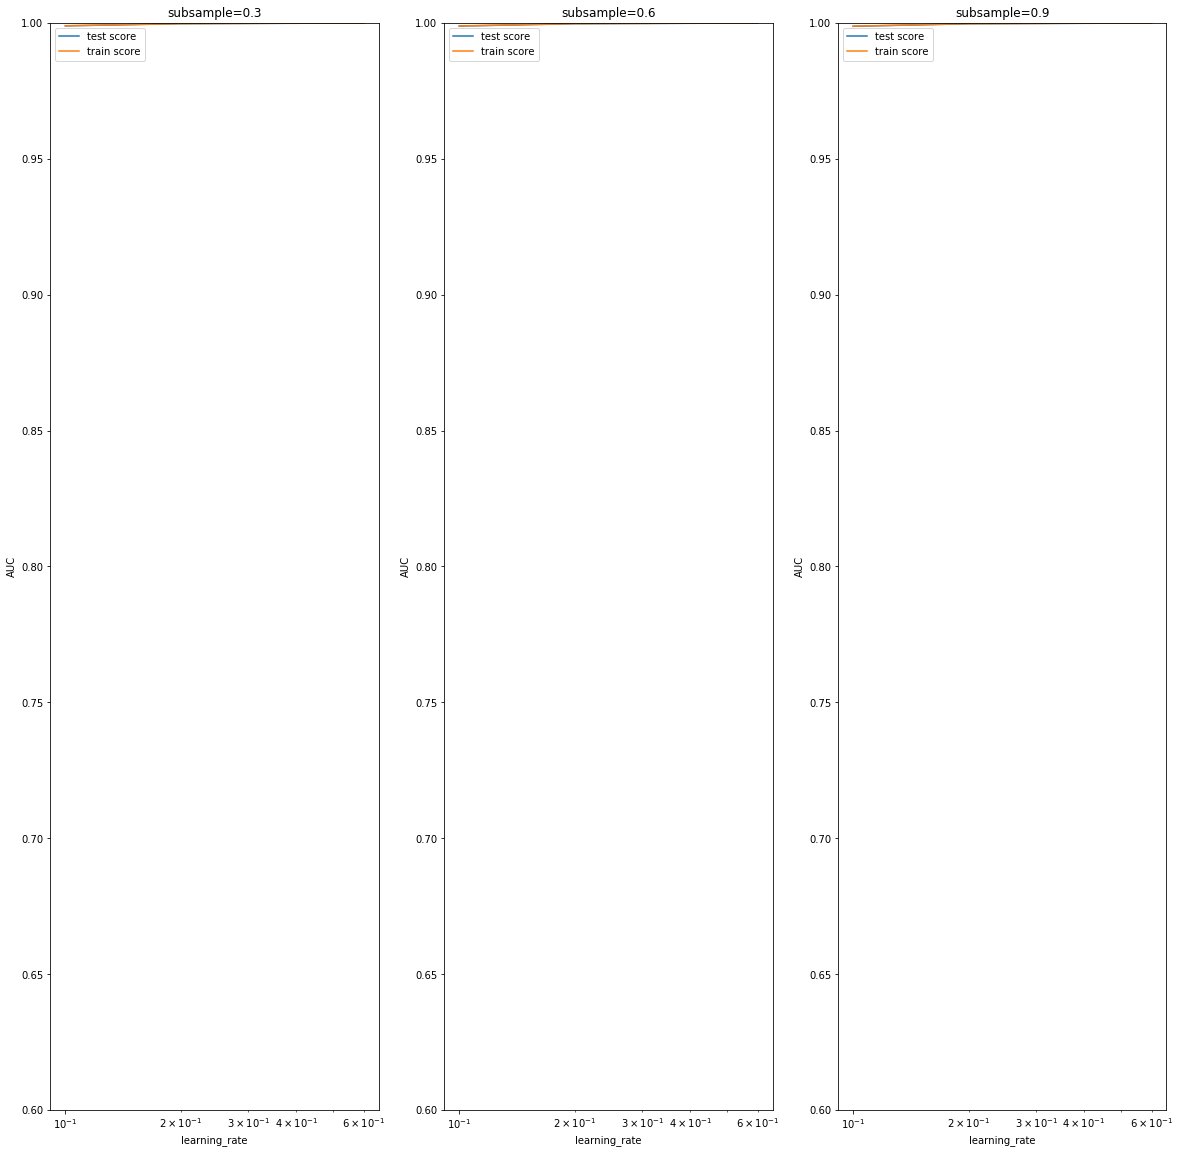

In [45]:
for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [46]:
# print best hyperparameters
print("Best AUC: ", model_xg.best_score_)
print("Best Parameters: ", model_xg.best_params_)

Best AUC:  0.9999473153945482
Best Parameters:  {'learning_rate': 0.6, 'subsample': 0.9}


### XGBoost using Smote with tuned parameters

In [35]:
# hyperparameter tuning with XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [36]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
param = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}
#clf = XGBClassifier(parameters = param)
clf = XGBClassifier(max_depth=2, n_estimators=200, learning_rate = 0.6, subsample = 0.9) #initialise the model with optimum hyperparameters
clf.fit(X_train_smote, y_train_smote)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
# predict
y_pred = clf.predict_proba(X_train_smote)

auc = roc_auc_score(y_train_smote, y_pred[:, 1])

#print the evaluation score on the X_test by choosing the best evaluation metric
auc

0.999975075672384

### Print the class distribution after applying ADASYN

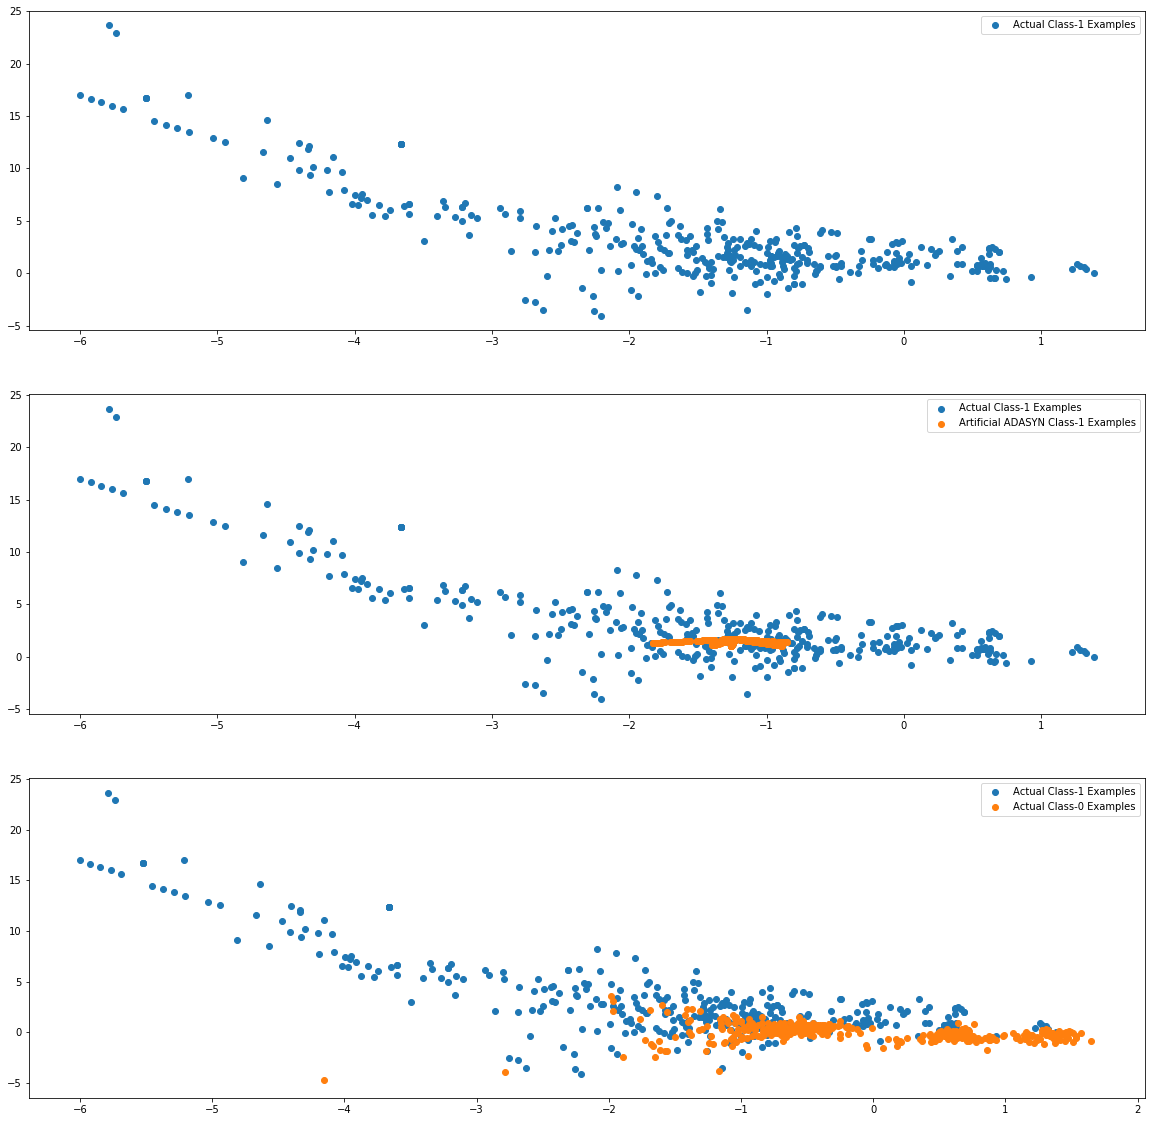

In [27]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Vanilla Logistic Regression Using Adasyn

In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
logreg.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=-1, penalty='l2', random_state=0,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [25]:
# Check the accuracy of the vanila Logistic Regression Model
logreg.score(X_train_adasyn, y_train_adasyn)

0.8929155128063836

### Random Forest Using Adasyn :1

In [42]:

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rf = RandomForestClassifier()

# parameters to build the model on
params = {'n_estimators': range(50, 500, 50)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


# create gridsearch object
model = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [43]:
# Fit the model
model.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 125.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [44]:
# scores of GridSearch CV
scores = model.cv_results_
pd.DataFrame(scores)

# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best Parameters: ", model.best_params_)

Best AUC:  0.9999999311059188
Best Parameters:  {'n_estimators': 400}


In [45]:

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rf1 = RandomForestClassifier()

# parameters to build the model on
params = {'n_estimators': range(350, 400, 10)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


# create gridsearch object
model = GridSearchCV(estimator=rf1, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [46]:
# Fit the model
model.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 107.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [47]:
# scores of GridSearch CV
scores = model.cv_results_
pd.DataFrame(scores)

# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best Parameters: ", model.best_params_)

Best AUC:  0.9999998800263933
Best Parameters:  {'n_estimators': 370}


In [48]:

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rf2 = RandomForestClassifier()

# parameters to build the model on
params = {'n_estimators': range(365, 375, 2)}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)


# create gridsearch object
model = GridSearchCV(estimator=rf2, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [50]:
# Fit the model
model.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 110.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
            

In [51]:
# scores of GridSearch CV
scores = model.cv_results_
pd.DataFrame(scores)

# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best Parameters: ", model.best_params_)

Best AUC:  0.9999999141160556
Best Parameters:  {'n_estimators': 365}


#### XGBoost Using Adasyn

In [26]:
# hyperparameter tuning with XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9, 0.12]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

In [27]:
# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn) 

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 15.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                   

In [28]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,19.578191,2.778464,0.222709,5.672854e-03,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.992236,0.979291,0.979630,0.983719,0.006024,11,0.996567,0.997324,0.997380,0.997090,0.000370
1,26.838192,0.429478,0.241361,6.030209e-03,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.993080,0.980880,0.978318,0.984092,0.006440,10,0.996570,0.997293,0.997344,0.997069,0.000353
2,33.647746,0.827085,0.270769,7.364628e-03,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.992679,0.979001,0.977879,0.983187,0.006728,12,0.996668,0.997154,0.997323,0.997048,0.000278
3,16.683584,0.045989,0.265561,1.123916e-07,0.1,0.12,"{'learning_rate': 0.1, 'subsample': 0.12}",0.993428,0.980245,0.979988,0.984554,0.006276,9,0.997146,0.997365,0.997606,0.997372,0.000188
4,22.676970,0.398744,0.265562,2.973602e-07,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.995543,0.983768,0.991448,0.990253,0.004881,5,0.999266,0.999309,0.999395,0.999323,0.000054
5,30.336630,0.332360,0.270769,7.363954e-03,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.995240,0.983831,0.990182,0.989751,0.004667,7,0.999299,0.999345,0.999318,0.999321,0.000019
6,34.481491,0.077933,0.265562,2.247832e-07,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.994243,0.982495,0.992847,0.989862,0.005240,6,0.999251,0.999321,0.999332,0.999301,0.000036
7,16.678377,0.058913,0.275976,1.472813e-02,0.2,0.12,"{'learning_rate': 0.2, 'subsample': 0.12}",0.995790,0.983842,0.991434,0.990355,0.004937,4,0.999350,0.999278,0.999322,0.999317,0.000029
8,22.468685,0.249398,0.260355,7.364459e-03,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.989266,0.981470,0.994803,0.988513,0.005469,8,0.999960,0.999947,0.999935,0.999947,0.000010
9,30.180406,0.365892,0.260354,1.472757e-02,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.990672,0.988100,0.997496,0.992089,0.003964,1,0.999972,0.999950,0.999956,0.999959,0.000009


In [29]:
# convert parameters to int for plotting on x-axis
cv_results['param_learning_rate'] = cv_results['param_learning_rate'].astype('float')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,19.578191,2.778464,0.222709,5.672854e-03,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.992236,0.979291,0.979630,0.983719,0.006024,11,0.996567,0.997324,0.997380,0.997090,0.000370
1,26.838192,0.429478,0.241361,6.030209e-03,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.993080,0.980880,0.978318,0.984092,0.006440,10,0.996570,0.997293,0.997344,0.997069,0.000353
2,33.647746,0.827085,0.270769,7.364628e-03,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.992679,0.979001,0.977879,0.983187,0.006728,12,0.996668,0.997154,0.997323,0.997048,0.000278
3,16.683584,0.045989,0.265561,1.123916e-07,0.1,0.12,"{'learning_rate': 0.1, 'subsample': 0.12}",0.993428,0.980245,0.979988,0.984554,0.006276,9,0.997146,0.997365,0.997606,0.997372,0.000188
4,22.676970,0.398744,0.265562,2.973602e-07,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.995543,0.983768,0.991448,0.990253,0.004881,5,0.999266,0.999309,0.999395,0.999323,0.000054


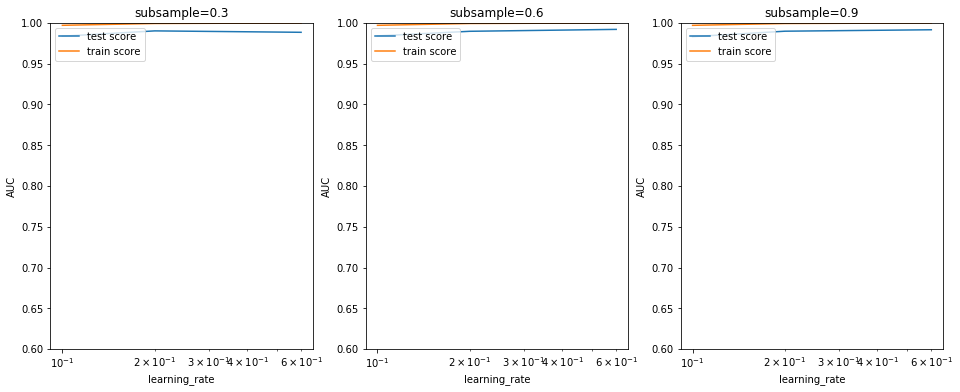

In [30]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.1, 0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [31]:
# print best hyperparameters
print("Best AUC: ", model_cv.best_score_)
print("Best Parameters: ", model_cv.best_params_)

Best AUC:  0.9920893883505512
Best Parameters:  {'learning_rate': 0.6, 'subsample': 0.6}


In [28]:
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [29]:
X_train_adasyn = pd.DataFrame(data = X_train_adasyn, columns = X_train.columns )

In [30]:
X_train_adasyn.shape

(426475, 29)

In [31]:
# hyperparameter tuning with XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
#clf = XGBClassifier(parameters = param)
clf = XGBClassifier(max_depth=2, n_estimators=200, learning_rate = 0.6, subsample = 0.6) #initialise the model with optimum hyperparameters
clf.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
# predict
y_pred = clf.predict_proba(X_test)

auc = roc_auc_score(y_test, y_pred[:, 1])

In [33]:
auc

0.9802865630901697

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


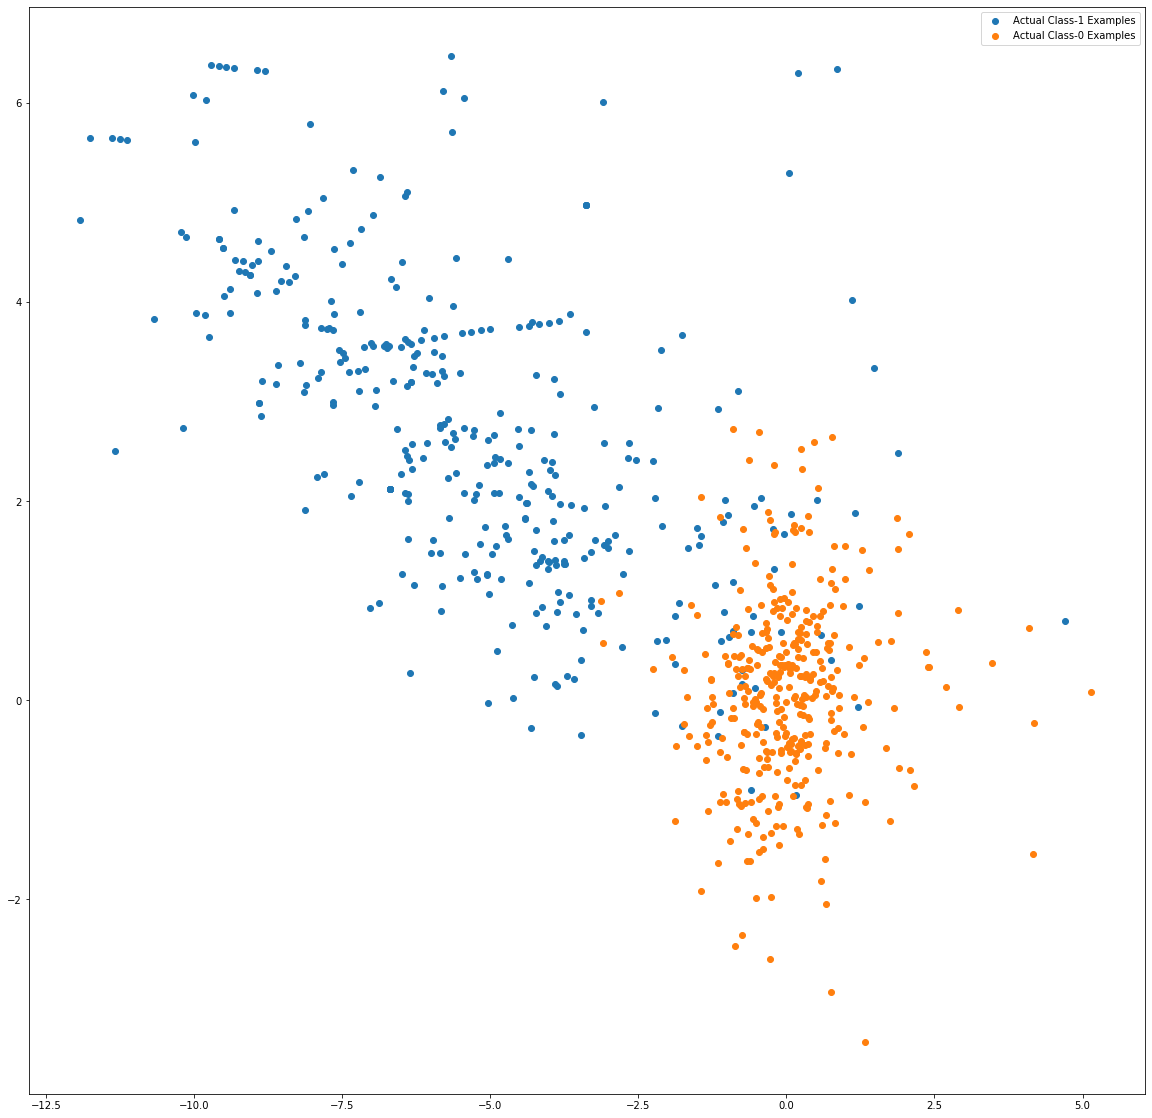

In [34]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [35]:
# predict
y_train_adasyn_pred = clf.predict_proba(X_train_adasyn)

auc = roc_auc_score(y_train_adasyn, y_train_adasyn_pred[:, 1])

In [36]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [108]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_adasyn, y_train_adasyn_pred[:, 1], drop_intermediate = False )

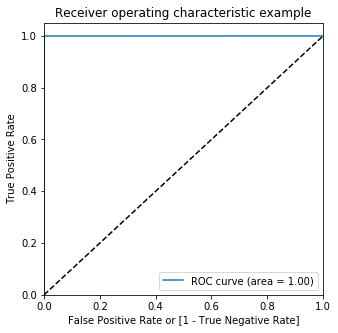

In [109]:
draw_roc(y_train_adasyn, y_train_adasyn_pred[:, 1])

In [112]:

#### Print the FPR,TPR & select the best threshold from the roc curve
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_adasyn_pred[:, 1]))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_adasyn_pred[:, 1], drop_intermediate = False)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9999119254207348
0.74845785


### Final Prediction

In [74]:
y_test_pred = clf.predict_proba(X_test)

In [75]:
#Convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [84]:
# convert y_test_pred to dataframe
y_pred_df = pd.DataFrame(y_test_pred[:,1])

In [85]:
y_pred_df.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [86]:
# Concatenate y_test_df, y_pred_df
y_pred_final = pd.concat([y_test_df,y_pred_df], axis = 1)

In [90]:
y_pred_final = y_pred_final.rename(columns = {0: 'Prob'})

In [92]:
y_pred_final.head()

,Class,Prob
0,0,1.538142e-07
1,0,8.435876e-08
2,0,1.677217e-07
3,0,2.396923e-05
4,0,1.920489e-08


In [93]:
# Define the class based on the threshold value (0.74)
y_pred_final['final_predicted'] = y_pred_final.Prob.map(lambda x : 1 if x > 0.74 else 0)

In [96]:
y_pred_final.head()

,Class,Prob,final_predicted
0,0,1.538142e-07,0
1,0,8.435876e-08,0
2,0,1.677217e-07,0
3,0,2.396923e-05,0
4,0,1.920489e-08,0


In [97]:
#Let's check the overall 
metrics.accuracy_score(y_pred_final.Class, y_pred_final.final_predicted)

0.9963765062779135

In [98]:
confusion = metrics.confusion_matrix(y_pred_final.Class, y_pred_final.final_predicted)

In [99]:
confusion

array([[70840,   239],
       [   19,   104]], dtype=int64)

In [100]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negative
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
#Let's see the recall/sensitivity of the final model
print("Recall => {}".format(TP/float(TP+FN)))

Recall => 0.8455284552845529


In [107]:
#Let's see the Precision of the final model
print("Precision => {}".format(TP/float(TP+FP)))

Precision => 0.3032069970845481


## Model Performance and Evaluation Summary

- The Credit Card Fraud detection using Machine Learning was performed using various ML models and techniques. The performance of the models are summarized below


#### Data-set with Class Imbalance
##### Base Model
- Logistics Regresion
    - Accuracy ~ 99.99%
    - Lasso
        - R2 ~ 93.68%
- Random Forest
    - RF1 - AUC ~96.41 | n_estimator = 450 
    - RF2 - AUC ~96.25 | n_estimator = 470
    - RF3 - AUC ~96.38 | n_estimator = 474
- XG Boost 
    - AUC ~98.4% | Learning_rate = 0.6
    - Recall - 84.48%
    - Precision - 30.33%

#### Data-set with Class Balanced

- The Class balancing techniques used are 
    - Random Sampling
    - SMOTE
    - ADASYN
- The performance of the various ML models under each of the Class balancing techniques are listed below  


##### Random OverSampling
- Logistic Regression
    - Accuracy = 97.8%
- Random Forest
    - RF1 - AUC = 100 | n_estimator = 100
    - RF2 - AUC = 100 | n_estimator = 090
    - RF3 - AUC = 100 | n_estimator = 085
- XG-Boost
    - AUC = 99.99% | Learnig_Rate = 0.6
        
##### SMOTE
- Logistic Regression
    - Accuracy = 94.9%
- Random Forest
    - RF1 - AUC = 99.9% | n_estimator = 300
    - RF2 - AUC = 99.9% | n_estimator = 270
    - RF3 - AUC = 99.9% | n_estimator = 260
- XG-Boost
    - AUC = 99.99% | Learnig_Rate = 0.6
    
##### ADASYN
- Logistic Regression
   - Accuracy = 89.3%
- Random Forest
  - RF1 - AUC = 99.99% | n_estimator = 300
- XG-Boost
  - AUC = 96.98% | Learnig_Rate = 0.6
  - Recall = 84.55% 
  - Precision = 30.33%
    

## Conclusion

- The Best Class Imbalance mitigation technique can either be Random oversampling technique or the ADASYN as the Models have produced the best AUC
- The XGBOOST is the best model which hasproduced a ~99% AUC using Random Oversampling method and 99.99% AUC using the ADASYN technique. Also, it took around 17 mins for the training.